<a href="https://colab.research.google.com/github/majiddaeinejad/quera-ai-bootcamp-divar/blob/statistical_analysis/Question_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setup cell

In [ ]:
!pip install arabic-reshaper python-bidi jdatetime utm --quiet

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import arabic_reshaper
from bidi.algorithm import get_display
import jdatetime

import geopandas as gpd
from shapely.geometry import Polygon
import folium
from branca.colormap import StepColormap

rcParams['font.family'] = 'DejaVu Sans'

def fa_label(text):
    return get_display(arabic_reshaper.reshape(text))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.1/292.1 kB 8.6 MB/s eta 0:00:00


In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)


file_path = '/content/drive/MyDrive/Colab Notebooks/Divar.csv'


df = pd.read_csv(file_path , encoding='utf-8')

Mounted at /content/drive


/tmp/ipython-input-1578516001.py:9: DtypeWarning: Columns (11,27,29,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path , encoding='utf-8')


	توزیع قیمت فروش‌(price_value) را برای دسته‌بندی‌های سطح سه در یک نمودار رسم کنید

In [16]:
df_2 = df[df['cat2_slug'] != 'real-estate-services'].copy()

ad_type_mapping = {
    'residential-sell': 'Sale',
    'residential-rent': 'Rent',
    'commercial-rent': 'Rent',
    'commercial-sell': 'Sale',
    'temporary-rent': 'Rent'
}

df_2['ad_type'] = df_2['cat2_slug'].map(ad_type_mapping)


In [17]:
df_sales = df_2[df_2['ad_type'] == 'Sale'].copy()


In [18]:
cat3_labels = {
    "apartment-sell": "فروش آپارتمان",
    "apartment-rent": "اجاره آپارتمان",
    "plot-old": "زمین/کلنگی",
    "house-villa-sell": "فروش خانه/ویلا",
    "house-villa-rent": "اجاره خانه/ویلا",
    "shop-rent": "اجاره مغازه",
    "shop-sell": "فروش مغازه",
    "office-rent": "اجاره دفتر کار",
    "suite-apartment": "سوئیت آپارتمان",
    "presell": "پیش‌فروش",
    "villa": "ویلا",
    "industry-agriculture-business-sell": "فروش صنعتی/کشاورزی/تجاری",
    "industry-agriculture-business-rent": "اجاره صنعتی/کشاورزی/تجاری",
    "office-sell": "فروش دفتر کار",
    "partnership": "مشارکت",
    "workspace": "فضای کار"
}
df_sales['cat3_fa'] = df_sales['cat3_slug'].map(cat3_labels)

In [19]:
missing_count = df_sales['price_value'].isna().sum()
total_rows = len(df_sales)
missing_percent = (missing_count / total_rows) * 100
missing_percent

np.float64(5.10033150983401)

In [20]:
df_sales = df_sales.dropna(subset=['price_value'])

In [23]:

df_sales['price_million'] = df_sales['price_value'] / 1e6

/tmp/ipython-input-3556252717.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


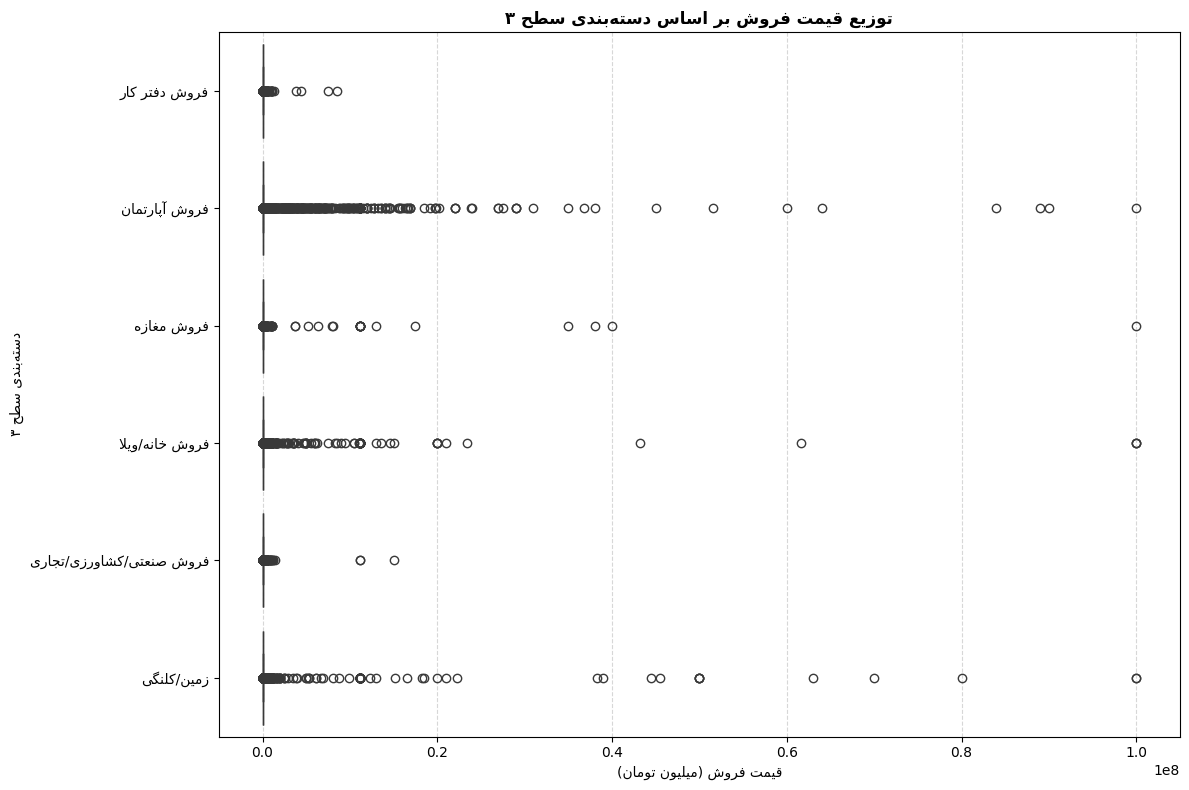

In [24]:
order = df_sales.groupby('cat3_fa')['price_million'].median().sort_values(ascending=False).index

plt.figure(figsize=(12, 8))
sns.boxplot(
    x='price_million',
    y='cat3_fa',
    data=df_sales,
    order=order,
    palette='Purples'
)


plt.yticks(range(len(order)), [fa_label(c) for c in order])


plt.xlabel(fa_label('قیمت فروش (میلیون تومان)'))
plt.ylabel(fa_label('دسته‌بندی سطح ۳'))
plt.title(fa_label('توزیع قیمت فروش بر اساس دسته‌بندی سطح ۳'), fontweight='bold')


plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


/tmp/ipython-input-235738408.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


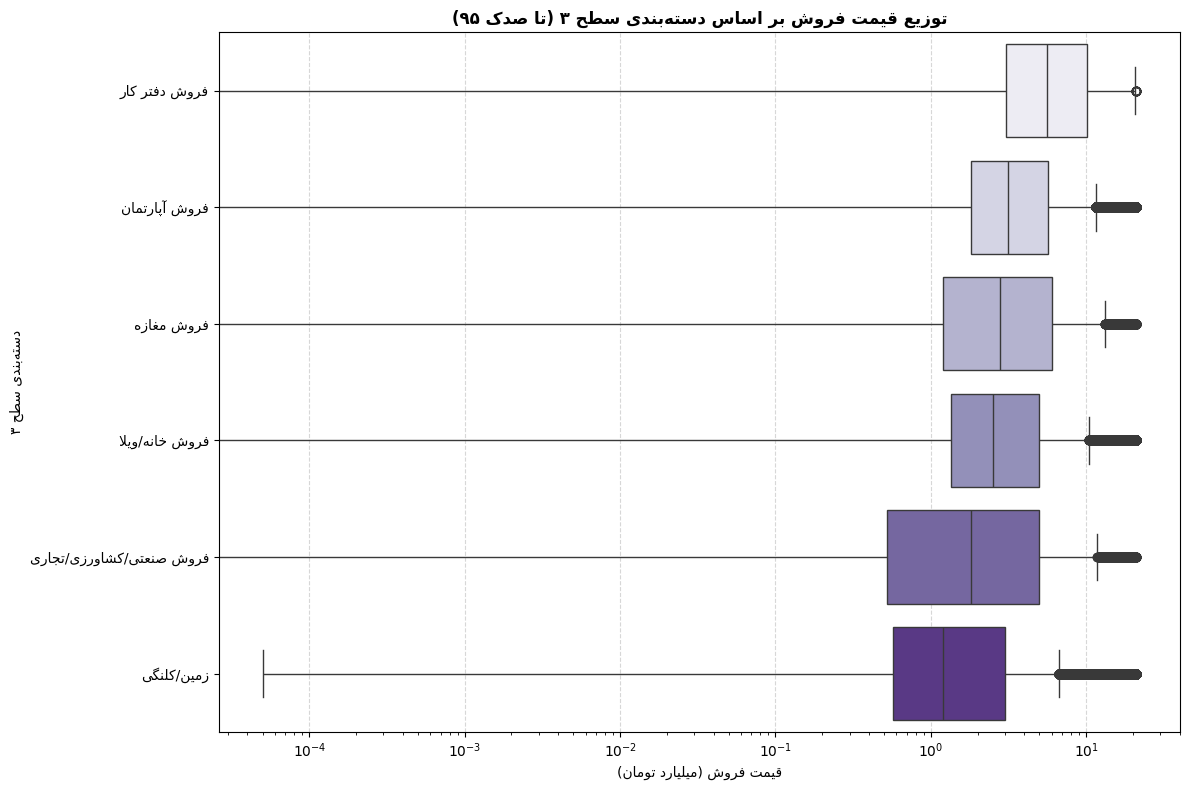

In [ ]:
q95 = df_sales['price_billion'].quantile(0.95)
df_filtered = df_sales[df_sales['price_billion'] <= q95]

order = df_filtered.groupby('cat3_fa')['price_billion'].median().sort_values(ascending=False).index

plt.figure(figsize=(12, 8))
sns.boxplot(
    x='price_billion',
    y='cat3_fa',
    data=df_filtered,
    order=order,
    palette='Purples'
)


plt.yticks(range(len(order)), [fa_label(c) for c in order])
plt.xlabel(fa_label('قیمت فروش (میلیارد تومان)'))
plt.ylabel(fa_label('دسته‌بندی سطح ۳'))
plt.title(fa_label('توزیع قیمت فروش بر اساس دسته‌بندی سطح ۳ (تا صدک ۹۵)'), fontweight='bold')


plt.xscale('log')


plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_sales['price_scaled'] = scaler.fit_transform(df_sales[['price_value']])
